In [300]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

**Part 1: Image Manipulation with Pillow.**

In [301]:
img_path = 'images/'

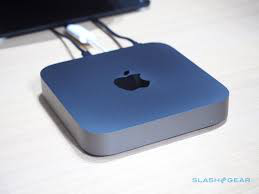

In [302]:
img = Image.open(img_path + 'computer1.jpg')
img

In [303]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [304]:
np_img = np.array(img)

np_img

array([[[  6,   5,  11],
        [  6,   5,  11],
        [  6,   5,  11],
        ...,
        [190, 188, 189],
        [190, 188, 189],
        [190, 188, 189]],

       [[  7,   6,  12],
        [  7,   6,  12],
        [  7,   6,  12],
        ...,
        [192, 190, 191],
        [192, 190, 191],
        [192, 190, 191]],

       [[  7,   6,  12],
        [  7,   6,  12],
        [  7,   6,  12],
        ...,
        [195, 193, 194],
        [195, 193, 194],
        [195, 193, 194]],

       ...,

       [[223, 222, 228],
        [223, 222, 228],
        [224, 223, 229],
        ...,
        [228, 227, 225],
        [228, 227, 225],
        [228, 227, 225]],

       [[225, 224, 230],
        [225, 224, 230],
        [225, 224, 230],
        ...,
        [223, 221, 222],
        [222, 220, 221],
        [222, 220, 221]],

       [[225, 224, 230],
        [225, 224, 230],
        [225, 224, 230],
        ...,
        [221, 219, 220],
        [221, 219, 220],
        [220, 218, 219]]

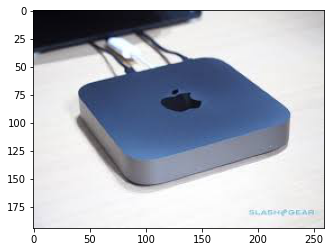

In [305]:
plt.imshow(np_img)

In [306]:
np_img.shape

(194, 259, 3)

A pixel is represented by (Red, Green, Blue) or (R,G,B). Each R, G and B value is represented by a byte (8 bits = 2^8 = 256 values). Hence, each (R, G, B) = (2^8, 2^8, 2^8). 

Here, we normalize each R, G and B value to be within a range of 0.0 to 1.0 by dividing each with a value of 255. 

In [307]:
np_img_norm = np_img / 255

View normalized data.

In [308]:
np_img_norm

array([[[0.02352941, 0.01960784, 0.04313725],
        [0.02352941, 0.01960784, 0.04313725],
        [0.02352941, 0.01960784, 0.04313725],
        ...,
        [0.74509804, 0.7372549 , 0.74117647],
        [0.74509804, 0.7372549 , 0.74117647],
        [0.74509804, 0.7372549 , 0.74117647]],

       [[0.02745098, 0.02352941, 0.04705882],
        [0.02745098, 0.02352941, 0.04705882],
        [0.02745098, 0.02352941, 0.04705882],
        ...,
        [0.75294118, 0.74509804, 0.74901961],
        [0.75294118, 0.74509804, 0.74901961],
        [0.75294118, 0.74509804, 0.74901961]],

       [[0.02745098, 0.02352941, 0.04705882],
        [0.02745098, 0.02352941, 0.04705882],
        [0.02745098, 0.02352941, 0.04705882],
        ...,
        [0.76470588, 0.75686275, 0.76078431],
        [0.76470588, 0.75686275, 0.76078431],
        [0.76470588, 0.75686275, 0.76078431]],

       ...,

       [[0.8745098 , 0.87058824, 0.89411765],
        [0.8745098 , 0.87058824, 0.89411765],
        [0.87843137, 0

Crop and Resize our image.

In [309]:
width, height = img.size
pad = 20    # pixels

img_crop = img.crop((pad, pad, width-pad, height-pad))
img_64 = img_crop.resize((64,64))

img_64.size

(64, 64)

Plot the modified image.

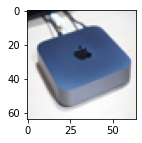

In [310]:
plt.subplots(figsize=(2,2))
plt.imshow(img_64)


In [311]:
img_64.save(img_path + 'computer_64x64.jpg')

Numpy concatenation.

In [312]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
c = np.array([[9, 10], [11, 12]])

x = a
x = np.concatenate((x, b))
x = np.concatenate((x, c))

x = x.reshape((-1, 2, 2))
x

array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]]])

**Part 2: Training with processed images.**

In [313]:
x_train = None

for i in range(1, 8):
    img_raw = Image.open(img_path + 'computer{0}.jpg'.format(i))
    img_tiny = img_raw.resize((64,64))
    if x_train is None:
        x_train = img_tiny
    else:
        x_train = np.concatenate((x_train, img_tiny))

x_train = x_train.reshape(-1, 64, 64, 3)        
x_train.shape

(7, 64, 64, 3)

Verify that our data is reshaped correctly but randomly retrieving an individual data to view.

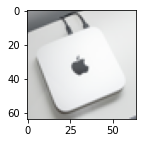

In [314]:
img2 = Image.fromarray(x_train[1])

plt.subplots(figsize=(2,2))
plt.imshow(img2)

One-Hot Encode our labels to denote if a particular sample is a Mac Mini or not.

In [315]:
y_train = np.array([
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [0, 1],
    [0, 1],
    [0, 1]
])

Construct our CNN model to learn from the data.

In [316]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(5, 5),
    activation='relu',
    input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

Our model is a Classifier, hence use "categorical crossentropy" as our loss function.

In [317]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train our model.

In [318]:
hist = model.fit(x=x_train/255, y=y_train, epochs=15)

Train on 7 samples
Epoch 1/15
7/7 [==============================] - 0s 13ms/sample - loss: 0.7021 - acc: 0.5714
Epoch 2/15
7/7 [==============================] - 0s 8ms/sample - loss: 0.3082 - acc: 1.0000
Epoch 3/15
7/7 [==============================] - 0s 7ms/sample - loss: 4.0416 - acc: 0.4286
Epoch 4/15
7/7 [==============================] - 0s 8ms/sample - loss: 1.7866 - acc: 0.5714
Epoch 5/15
7/7 [==============================] - 0s 8ms/sample - loss: 0.9512 - acc: 0.5714
Epoch 6/15
7/7 [==============================] - 0s 9ms/sample - loss: 0.1596 - acc: 1.0000
Epoch 7/15
7/7 [==============================] - 0s 9ms/sample - loss: 0.3682 - acc: 0.8571
Epoch 8/15
7/7 [==============================] - 0s 9ms/sample - loss: 0.2448 - acc: 1.0000
Epoch 9/15
7/7 [==============================] - 0s 9ms/sample - loss: 0.3124 - acc: 0.8571
Epoch 10/15
7/7 [==============================] - 0s 8ms/sample - loss: 0.1779 - acc: 1.0000
Epoch 11/15
7/7 [==============================] 